# Introduction

<p align="justify">Welcome! In this case we'll be exploring how to use advanced analytic and machine learning techniques to predict diabetes among the Pima Indian population. 
<br>
<br>
<details>
<summary>Some of the skills you'll explore are (Click to Expand):</summary>
<ul>
    <li>Python Programming</li>
    <li>Data Cleaning</li>
    <li>Exploratory Data Analysis</li>
    <li>Data Visualization</li>
    <li>Leveraging Domain Knowledge</li>
    <li>Machine Learning</li>
    <li>Gradient Boosting Machines</li>
</details><br>
Don't worry if you're unsure what some of these terms are. They'll be explained throughout the case. Let's begin! 
<img src="https://i.stack.imgur.com/zlAi2.png" style="float: left; width: 33%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="https://cdn.images.express.co.uk/img/dynamic/11/590x/Diabetes-symptoms-870995.jpg" style="float: left; width: 35%; margin-bottom: 0.5em;">
<img src="https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/sankey-diagram-1.png" style="float: left; width: 28%; margin-left: 1%; margin-bottom: 0.5em;">

## Case Scenario

Imagine you're a program officer for the Indian Health Service (IHS). Your state has recently obtained a federal grant aimed at improving health equity. This includes improving care among traditionally disadvantaged groups. From working within the IHS for several years now, you know that American Indians are more likely to suffer from metabolic diseases, particularly diabetes. With this grant, you now have the chance to leverage new technologies in analytics and machine learning to improve care among this group. What role can these technologies play in improving diabetes care among this vulnerable population?

Let's find out. 

### Clinical Background: Diabetes

Diabetes describes a group of metabolic disorders that is characterized by abnormally high blood glucose (blood sugar). Insulin is a critical hormone that allows the body to take up glucose and use it as energy. Diabetes occurs when your body does not produce enough insulin or cannot use insulin well. When this happens, glucose stays in your blood instead of being used as energy. Over time, this glucose in your blood can lead to various health problems. These can include serious complications such as blindness, limb amputation, and stroke. 

<img src="http://cdn.shopify.com/s/files/1/0582/0445/files/blood-sugar-levels-and-paleo_diagram_of_excessive_blood_glucose.jpg?14686865159083212781" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

Diabetes is common among individuals over 45 years old, have a family history of diabetes, and are overweight. Poor lifestyle choices such as not exercising or smoking can also increase the risk. Diabetes is one of the most common conditions in the United States with over 30 million people suffering from diabetes. The total estimated cost of diabetes to the health care system is estimated to be $327 Billion. Current treatment includes insulin and medication to control blood glucose levels. Lifestyle modifications before the onset of diabetes can make a huge difference in whether a person develops diabetes. Any algorithm which could reliably predict diabetes could give providers critical information to intervene before a patient has diabetes.

## Using Jupyter Notebook 

To run any of the code, select the code cell on the **bottom right (1.2)**, and click the `Run` button on the toolbar above. Try it out on the example code cell below on the **bottom right (1.2)**.

**The** `Run` **Button**
<img src="https://i.imgur.com/jr4dpLW.png" style="width:300px;height:150px;">

In [8]:
# This is an example of a code cell
print('Congratulations!')
print('You\'ve run your first code cell.')


Congratulations!
You've run your first code cell.


### Jupyter Notebook Background

What is a Jupyter Notebook? Why is it so special? Below is a definition of Jupyter Notebook from the creators. 

> "The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more." - [jupyter.org](https://www.jupyter.org)

Through integrating code, text, and multimedia, jupyter notebook allows us to create a digital notebook that is both **interactive** and **informative**. Don't just take my word for it though, personally explore how Jupyter Notebook can augment your learning through the case!
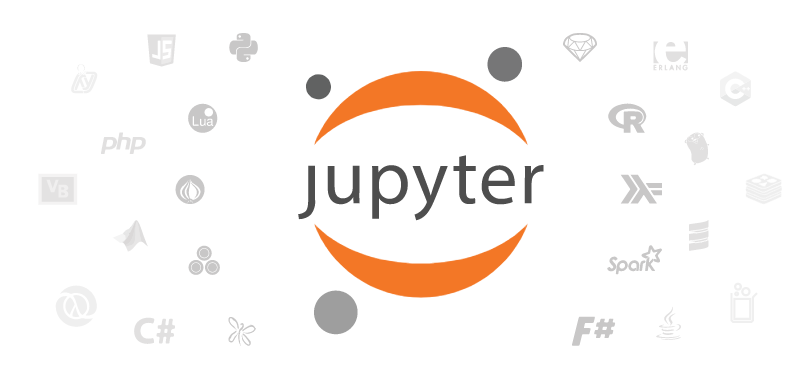


### Case Code Tips

Within code cells you will see green text preceded by a `#` symbol. These are comments and will help explain what portions of the code are doing. All code should be ready to run as shown. 

Some code may require more time to run. On the left hand side you will notice the label: `In [ ]:`. If there is an `*` in between the `[]`'s after you select `Run`, that indicates that your code is in the process of running. Like so: `In [*]:`

## Meeting Our Data

We'll be using a set of patient data made available by the National Institute of Diabetes and Digestive and Kidney Diseases. It's important to note that several constraints were made in order to acquire the dataset. All patients are female, at least 21 years old, and of Pima Indian heritage. The variables selected were chosen due to being significant risk factors for diabetes among Pimas or other population groups. The data is hosted on [kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database), a data science community website. 

**Acknowledgements** <br>
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Data File

<p style="text-align: center;">diabetes.csv</p>

***
This file contains our dataset. There are a little over 768 patients with 9 variables. The data includes mostly clinical data. 

The dataset will already be downloaded for the case. The The original data can be acceded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database#diabetes.csv). 

### Consulting the Data Dictionary

There are several variables or labels you might not understand. There are many reasons for this. You might lack domain experience for the data you're analyzing. The data creators might also have used arbitrary labels only they understood (this is considered a bad practice).

The way to combat this is consulting the data dictionary or documentation. These are tables or documents which describe the data in detail. Have a variable you don't understand? Check the documentation! Don't understand what an output for a variable means? Check the documentation!


Unfortunately, no documentation is provided on the original data page. However, the original study the data comes from is available [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/pdf/procascamc00018-0276.pdf). The relevant information has been added below for your convenience. 

<center>

| *Variable*               | *Definition*                                                         |
| ------------------------ | -------------------------------------------------------------------- |
| Pregnancies              | Number of times pregnant                                             |
| Glucose                  | Plasma glucose concentration following a 2 hour oral glucose tolerance test                                             |
| BloodPressure            | Diastolic Blood Pressure (mm Hg)                                     | 
| SkinThickness            | Triceps Skin Fold Thickness (mm)                                     |
| Insulin                  | 2-Hour Serum Insulin Levels                                          |
| BMI                      | Weight in kg / (Heigh in m)^2                                        |
| DiabetesPedigreeFunction | Measure of expected genetic influence on the subject's diabetes risk |
| Age                      | Age (Years)                                                          |
| Outcome                  | Diabetes as defined as plasma glucose concentration > 200 mg/dl two hours after ingestion of 75 gram carbohydrate solution |


</center>

# Setup (Do Not Skip)

Run the code below to set up specific settings for our case. Do not skip this step!

In [9]:
# Calling external libraries for additional functionality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy

import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pandas.api.types import CategoricalDtype 
plt.style.use('fivethirtyeight')
# Increase max number of columns displayed in output tables
pd.set_option("display.max_columns",50)

# Make sure your ML results are the same
random.seed(10)

print('Setup complete!')

Setup complete!


# Cleaning Our Data

The first step in any analytic project is to clean our data. This is a critical step that is commonly overlooked within data science projects. This is critical for making our data convenient to be interpreted and manipulated. In addition, many analytic techniques require properly formatted data. Finally, healthcare datasets may have data that isn't clinically relevant (ie. raw lab values). Processing can convert these variables into clinically meaningful information. It won't matter how sophisticated our analysis is if we don't properly process our data. A common saying in data science is "Junk in, Junk out". 

## Inspecting Our Data

We'll read in our data so we can clean and use it. 

In [10]:
# Note: Unicode Transformation Format – 8 (UTF-8) is a standard to encode characters in different languages
print('Data loading, please wait')
pima_diabetes = pd.read_csv("data/diabetes.csv",  encoding="UTF-8", sep=",")
print('Data loaded!')

Data loading, please wait
Data loaded!


Now let's get an overview of our data

In [11]:
pima_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


For the most part all values are classified correctly as numeric or categorical besides the `Outcome` variable.  In addition there seems to be some odd values. There are individuals with a `BMI` of 0 or 67.1, likely implausible values. Other instances of implausible values include a `Glucose` of 0, 17 `Pregnancies`, and `SkinThickness` of 99 mm. We will consider all of these characteristics as we clean our data. 

## Recoding Variables

First let's recode the variable `Outcome`into something meaningful. Based upon the data dictionary, we can see that `1` indicates the patient is classified as having Diabetes. `0` indicates they are not classified as having diabetes. 

In [14]:
# Recoding
pima_diabetes.Outcome=pima_diabetes.Outcome.apply(lambda x:'Diabetes' if x == 1 else 'No diabetes')
print('Data Recoded')

Data Recoded


Let's confirm our changes

In [15]:
pima_diabetes.Outcome.head()

0       Diabetes
1    No diabetes
2       Diabetes
3    No diabetes
4       Diabetes
Name: Outcome, dtype: object

## Checking for Missing Values

Let's examine the number of missing values

In [16]:
print('Number of Missing Data for Each Variable:')
pima_diabetes.isna().sum()

Number of Missing Data for Each Variable:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

This is very interesting. There are no missing values. If this is true, then this is an incredibly clean dataset. However, this is rarely the case. It's more likely that Python cannot recognize missing or erroneous values as being missing. 

All of our variables are numeric so it is unlikely there will be categories of erroneously coded data. The more likely option is that there are implausible values. This will increase our number of missing values.

### Removing Implausible Values

Earlier we saw several implausible values. These include `Glucose`, `BloodPressure`, `SkinThickness`, `Pregnancies`, `Insulin`, and `BMI`. Lets take a closer look.

In [17]:
print('Glucose:')
pima_diabetes.Glucose.quantile((0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1))

Glucose:


0.00      0.00
0.01     57.00
0.05     79.00
0.10     85.00
0.25     99.00
0.50    117.00
0.75    140.25
0.90    167.00
0.95    181.00
0.99    196.00
1.00    199.00
Name: Glucose, dtype: float64

In [18]:
print('Blood Pressure:')
pima_diabetes.BloodPressure.quantile((0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1))

Blood Pressure:


0.00      0.0
0.01      0.0
0.05     38.7
0.10     54.0
0.25     62.0
0.50     72.0
0.75     80.0
0.90     88.0
0.95     90.0
0.99    106.0
1.00    122.0
Name: BloodPressure, dtype: float64

In [19]:
print('Skin Thickness:')
pima_diabetes.SkinThickness.quantile((0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1))

Skin Thickness:


0.00     0.00
0.01     0.00
0.05     0.00
0.10     0.00
0.25     0.00
0.50    23.00
0.75    32.00
0.90    40.00
0.95    44.00
0.99    51.33
1.00    99.00
Name: SkinThickness, dtype: float64

In [20]:
print('Serum Insulin:')
pima_diabetes.Insulin.quantile((0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1))

Serum Insulin:


0.00      0.00
0.01      0.00
0.05      0.00
0.10      0.00
0.25      0.00
0.50     30.50
0.75    127.25
0.90    210.00
0.95    293.00
0.99    519.90
1.00    846.00
Name: Insulin, dtype: float64

In [21]:
print('BMI:')
pima_diabetes.BMI.quantile((0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1))

BMI:


0.00     0.000
0.01     0.000
0.05    21.800
0.10    23.600
0.25    27.300
0.50    32.000
0.75    36.600
0.90    41.500
0.95    44.395
0.99    50.759
1.00    67.100
Name: BMI, dtype: float64

In [22]:
print('Pregnancies')
pima_diabetes.Pregnancies.quantile((0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1))

Pregnancies


0.00     0.0
0.01     0.0
0.05     0.0
0.10     0.0
0.25     1.0
0.50     3.0
0.75     6.0
0.90     9.0
0.95    10.0
0.99    13.0
1.00    17.0
Name: Pregnancies, dtype: float64

Based on the percentiles above, we can get a better sense of implausible and plausible values. Based on the results we can make the following judgements:

**Glucose:**
- Glucose is unlikely to go below 50 with the 1st percentile being 57. The 0 glucose measurement is physiologically impossible and likely to be an error or missing

**Blood Pressure:**
- Diastolic blood pressure is unlikely to go below 30 with the 5th percentile being 38.7. Patients at this level are likely to be considered hypotensive or in shock. 0 diastolic blood pressure is physiologically impossible and likely to be an error or missing.

**Skin Thickness:**
-  It is biologically unlikely that skin thickness would be above 80 mm or below 10 mm. This is confirmed by our percentile data with a huge jump between the 99th and 100th percentile. 

**Serum Insulin:**
-  2 hour serum insulin levels are physiologically unlikely to fall below 10 or above 300. This is confirmed by our percentile results. The jump from 95th to 99th and 100th percentile is enormous. In addition the values 0 for serum insulin are physiologically impossible and likely errors. 

**BMI:**
- BMI is unlikely to go above the 99th percentile of 50.759. The maximum of 67.1 seems biologically implausible. 
- BMI below the 5th percentile of 21.8 are possible. However, BMI values of 0 are likely mistakes. 

Based on these findings, let's reclassify implausible values as `Na`

In [23]:
pima_diabetes=pima_diabetes[pima_diabetes.Glucose>=50]
pima_diabetes=pima_diabetes[pima_diabetes.Pregnancies<=12]
pima_diabetes=pima_diabetes[pima_diabetes.BloodPressure>=30]
pima_diabetes=pima_diabetes[pima_diabetes.SkinThickness>=10]
pima_diabetes=pima_diabetes[pima_diabetes.SkinThickness<=80]
pima_diabetes=pima_diabetes[pima_diabetes.Insulin>=10]
pima_diabetes=pima_diabetes[pima_diabetes.Insulin<=500]
pima_diabetes=pima_diabetes[pima_diabetes.BMI>=10]
pima_diabetes=pima_diabetes[pima_diabetes.BMI<=50]

print('Data Recoded')

Data Recoded


## Creating Clinically Relevant Variables

Our data includes the raw lab values for BMI. This is not a very useful measure by itself. Let's convert it into something more clinically meaningful. 

- **Quantitative:** variables whose values are whole numbers (ie. numbers, percents)
- **Categorical:** variables whose values are selected from a group (ie. dog breeds, male/female) 

### BMI

BMI stands for Body Mass Index. This is a measure of body weight based upon a person's weight and height. This measure is commonly used to classify individuals as being overweight or a healthy weight. Below is the BMI formula. 

\[\large \frac{weight (kg)}{[height (m)]^{2}}\]

We will create a new variable which reflects the clinical cutoffs for bmi. 

**Knowledge Check:** What are the clinical cut-offs for BMI?

<center>

| *Category*     | *BMI Range*     |
| -------------- | --------------- |
| Underweight    | BMI < 18.5      |
| Healthy Weight | 18.5 ≤ BMI < 25 |
| Overweight     | 25 ≤ BMI < 30   |
| Obese          | 30 ≥ BMI        |

</center>

Let create the new variable 'bmi_interp' based on these cut-offs 

In [24]:
# Create 'bmi_interp'
pima_diabetes['bmi_interp']=pima_diabetes.BMI.apply(lambda x: 'Underweight' if x<18.5 
                                                   else('Healthy Weight' if (x >=18.5 and x<25)
                                                       else('Overweight' if (x>=25 and x<30) else 'Obese')))


print('\'bmi_interp\' variable created!')

'bmi_interp' variable created!


Let's confirm our results

In [25]:
pima_diabetes[['BMI','bmi_interp']].head()

,BMI,bmi_interp
3,28.1,Overweight
4,43.1,Obese
6,31.0,Obese
14,25.8,Overweight
16,45.8,Obese


#### Limitations and Considerations when using BMI

BMI is a simple, inexpensive, and common measure for body fat. However, there are several clinical considerations to keep in mind when using this measure. It's critical to keep in mind BMI is only a surrogate measure since it uses weight instead of actual body fat content in its calculations. Below are three examples of factors that can influence BMI:

- age: older adults usually have more body fat than younger adults for the same BMI
- gender: women tend to have greater amounts of body fat compared to men for the same BMI
- muscle mass: muscular individuals or athletes may have higher BMI due to increased muscle mass

[Source](https://www.cdc.gov/obesity/downloads/bmiforpactitioners.pdf)

<center>

| *Category*     | *Blood Glucose (mg/dl)*   |
| -------------- | ------------------------- |
| Diabetic       | 200 ≤ Blood Glucose       |
| Prediabetic    | 140 ≤ Blood Glucose < 200 |
| Healthy        |  Blood Glucose < 140      |

</center>

# Exploratory Data Analysis 

Now that we've cleaned our data we can begin exploring our data. Using this, we can see which features are good candidates for building our prediction model. Feature selection  will determine how good or how bad your model is. Bad feature selection can have a hugely negative impact on your model even if you used the most advanced techniques. Understanding the clinical nuances of your data can inform better feature selection

### Why Can't We Just Use All or Most Variables?

One issue you might be wondering about is why do we even need to select variables. Why not just use all of the variables? After all, more data lead to better models, right? This is a common misconception that even experienced analysts need to watch out for. Including too many features in your prediction model can lead to what is known as 'overfitting'. Overfitting is essentially where you build a model that adheres too closely to your current data set and is unable to predict observations that are not from your current data set. In other words, it is where you develop a model that tuned too closely to your current data, and is not generalizable to outside data sources. 

<img src="https://3gp10c1vpy442j63me73gy3s-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1527613915658.png" align="center" style="width: 50%; margin-bottom: 0.5em; margin-top: 0.5em;">

### Getting A Closer Look At Our Data

Let's take a closer look as we begin our exploratory data analysis. 

In [26]:
pima_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi_interp
3,1,89,66,23,94,28.1,0.167,21,No diabetes,Overweight
4,0,137,40,35,168,43.1,2.288,33,Diabetes,Obese
6,3,78,50,32,88,31.0,0.248,26,Diabetes,Obese
14,5,166,72,19,175,25.8,0.587,51,Diabetes,Overweight
16,0,118,84,47,230,45.8,0.551,31,Diabetes,Obese


In [27]:
pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 3 to 765
Data columns (total 10 columns):
Pregnancies                 368 non-null int64
Glucose                     368 non-null int64
BloodPressure               368 non-null int64
SkinThickness               368 non-null int64
Insulin                     368 non-null int64
BMI                         368 non-null float64
DiabetesPedigreeFunction    368 non-null float64
Age                         368 non-null int64
Outcome                     368 non-null object
bmi_interp                  368 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 31.6+ KB


In [28]:
pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,3.157609,121.154891,70.467391,28.877717,145.451087,32.695109,0.510413,30.497283
std,2.911435,30.140279,11.897337,10.138213,95.117096,6.320205,0.321791,9.880209
min,0.000000,56.000000,30.000000,10.000000,15.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,28.400000,0.269000,23.000000
50%,2.000000,117.500000,70.000000,29.000000,123.500000,33.100000,0.443500,27.000000
75%,5.000000,140.000000,78.000000,36.000000,183.500000,36.650000,0.674750,35.000000
max,12.000000,198.000000,110.000000,60.000000,495.000000,49.700000,2.288000,81.000000


In [29]:
pima_diabetes.bmi_interp.value_counts()

Obese             245
Overweight         80
Healthy Weight     42
Underweight         1
Name: bmi_interp, dtype: int64

This summary page presents us with quite a bit of data. The first thing to realize is that the output will differ based on whether the variable is numeric or categorical. Numeric outputs will include summary statistics while categorical variables will include frequency counts of each category. 

These summaries will provide a useful reference throughout our exploratory data analysis. 

## Assessing Numeric Variables

Let's take a look at our other variables

In [30]:
pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,3.157609,121.154891,70.467391,28.877717,145.451087,32.695109,0.510413,30.497283
std,2.911435,30.140279,11.897337,10.138213,95.117096,6.320205,0.321791,9.880209
min,0.000000,56.000000,30.000000,10.000000,15.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,28.400000,0.269000,23.000000
50%,2.000000,117.500000,70.000000,29.000000,123.500000,33.100000,0.443500,27.000000
75%,5.000000,140.000000,78.000000,36.000000,183.500000,36.650000,0.674750,35.000000
max,12.000000,198.000000,110.000000,60.000000,495.000000,49.700000,2.288000,81.000000


We can see that the most of our predictor variables are numeric with the exception of `bmi_interp`. Let's examine the distribution of these variables. 

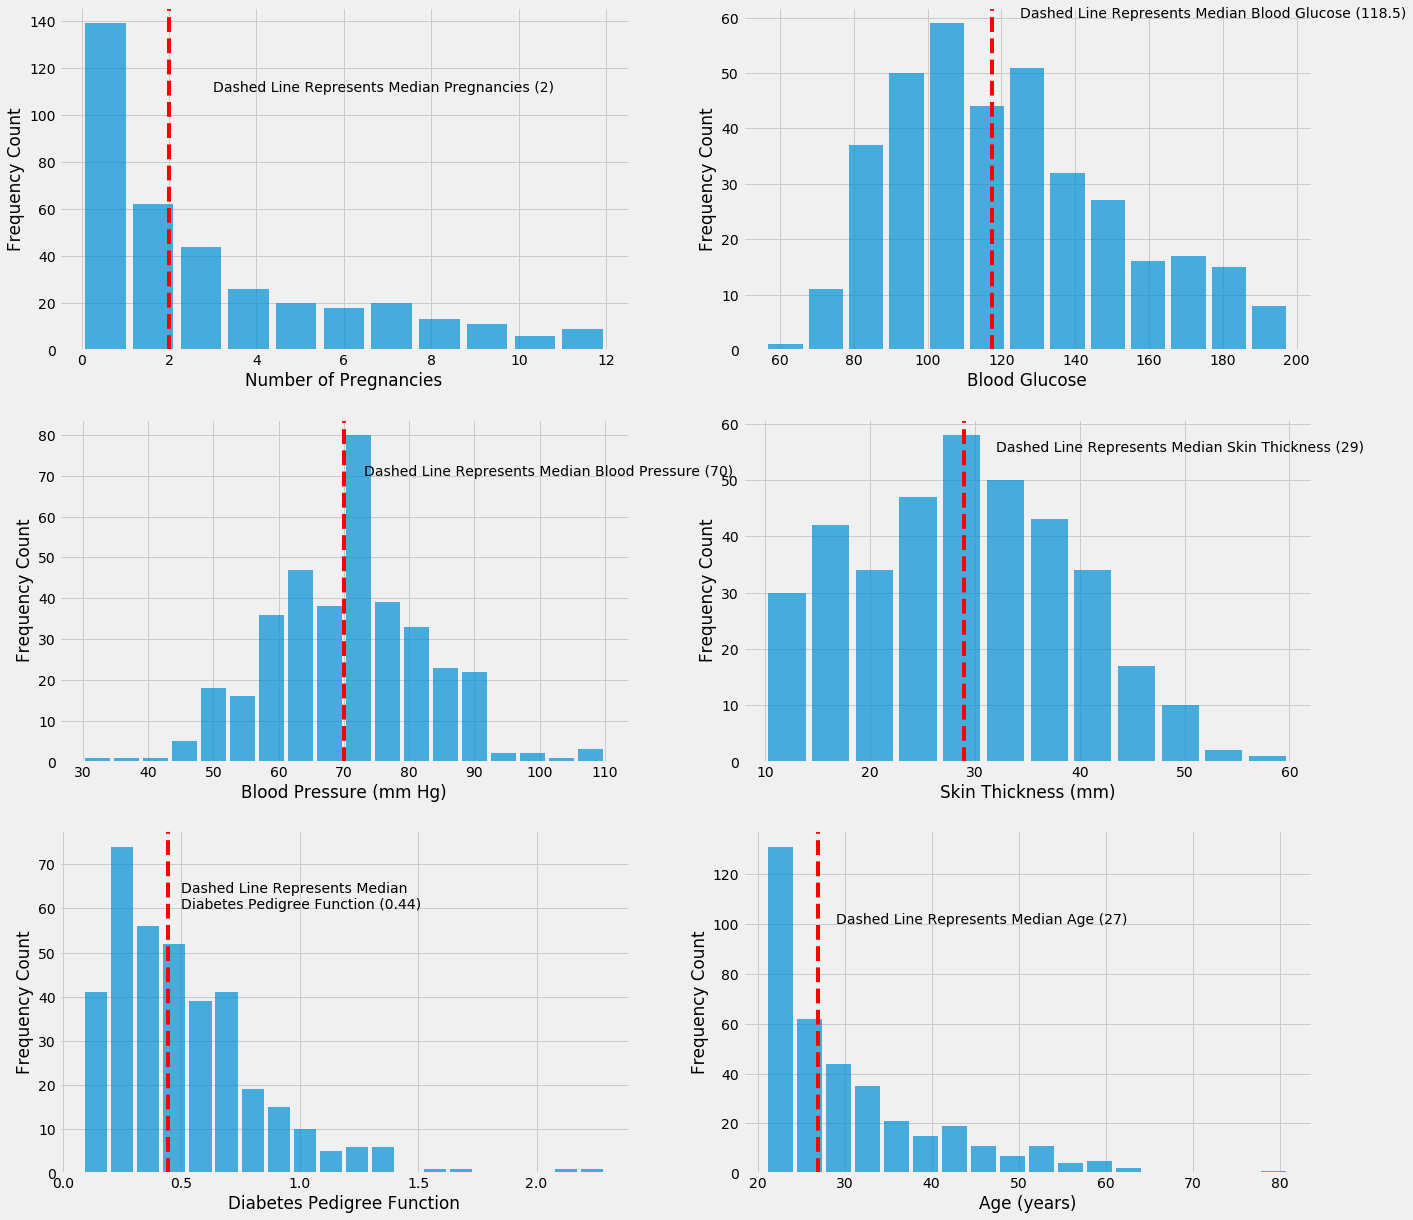

In [31]:
# Create Plot
fig = plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
n, bins, patches=plt.hist(pima_diabetes.Pregnancies,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Number of Pregnancies')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(pima_diabetes.Pregnancies.median(), color='r',linestyle='dashed')
plt.text(3,110,'Dashed Line Represents Median Pregnancies (2)')

plt.subplot(3,2,2)
n, bins, patches=plt.hist(pima_diabetes.Glucose,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Blood Glucose')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(pima_diabetes.Glucose.median(), color='r',linestyle='dashed')
plt.text(125,60,'Dashed Line Represents Median Blood Glucose (118.5)')

plt.subplot(3,2,3)
n, bins, patches=plt.hist(pima_diabetes.BloodPressure,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Blood Pressure (mm Hg)')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(pima_diabetes.BloodPressure.median(), color='r',linestyle='dashed')
plt.text(73,70,'Dashed Line Represents Median Blood Pressure (70)')

plt.subplot(3,2,4)
n, bins, patches=plt.hist(pima_diabetes.SkinThickness,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Skin Thickness (mm)')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(pima_diabetes.SkinThickness.median(), color='r',linestyle='dashed')
plt.text(32,55,'Dashed Line Represents Median Skin Thickness (29)')

plt.subplot(3,2,5)
n, bins, patches=plt.hist(pima_diabetes.DiabetesPedigreeFunction,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Diabetes Pedigree Function')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(pima_diabetes.DiabetesPedigreeFunction.median(), color='r',linestyle='dashed')
plt.text(0.5,60,'Dashed Line Represents Median \nDiabetes Pedigree Function (0.44)')

plt.subplot(3,2,6)
n, bins, patches=plt.hist(pima_diabetes.Age,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Age (years)')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(pima_diabetes.Age.median(), color='r',linestyle='dashed')
plt.text(29,100,'Dashed Line Represents Median Age (27)')

plt.show()

There does not appear to be any extreme values or prominent clusters. Now let's see if there is a relationship between diabetes and our predictors.

/Users/IssacQI/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


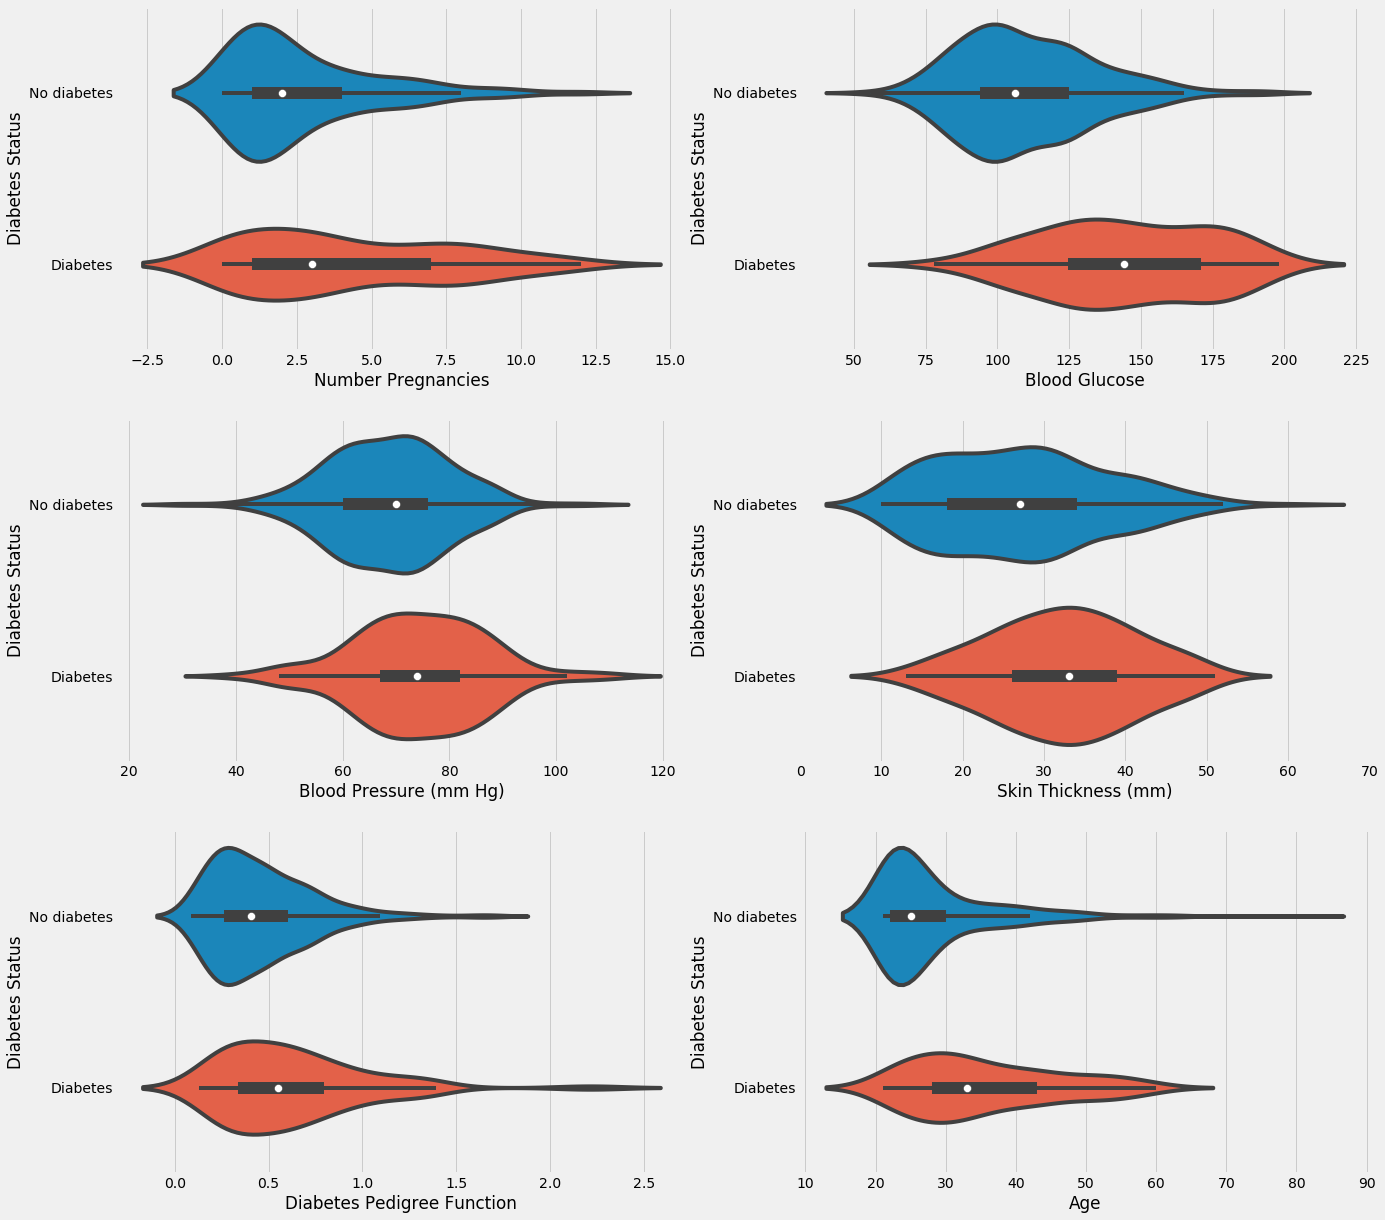

In [32]:
# Create Plot
fig = plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.violinplot(y=pima_diabetes.Outcome,x=pima_diabetes.Pregnancies,orient='h')
xlabel=plt.xlabel('Number Pregnancies')
ylabel=plt.ylabel('Diabetes Status')

plt.subplot(3,2,2)
sns.violinplot(y=pima_diabetes.Outcome,x=pima_diabetes.Glucose,orient='h')
xlabel=plt.xlabel('Blood Glucose')
ylabel=plt.ylabel('Diabetes Status')

plt.subplot(3,2,3)
sns.violinplot(y=pima_diabetes.Outcome,x=pima_diabetes.BloodPressure,orient='h')
xlabel=plt.xlabel('Blood Pressure (mm Hg)')
ylabel=plt.ylabel('Diabetes Status')

plt.subplot(3,2,4)
sns.violinplot(y=pima_diabetes.Outcome,x=pima_diabetes.SkinThickness,orient='h')
xlabel=plt.xlabel('Skin Thickness (mm)')
ylabel=plt.ylabel('Diabetes Status')

plt.subplot(3,2,5)
sns.violinplot(y=pima_diabetes.Outcome,x=pima_diabetes.DiabetesPedigreeFunction,orient='h')
xlabel=plt.xlabel('Diabetes Pedigree Function')
ylabel=plt.ylabel('Diabetes Status')

plt.subplot(3,2,6)
sns.violinplot(y=pima_diabetes.Outcome,x=pima_diabetes.Age,orient='h')
xlabel=plt.xlabel('Age')
ylabel=plt.ylabel('Diabetes Status')

Overall, most variables have different distribution between 'No Diabetes' and 'Diabetes'. This indicates that these variables can discriminate between our two outcomes and are likely excellent candidate predictor variables

The only exception is `Blood Pressure`. However, we cannot throw out `Blood Pressure`. [Relevant literature](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3314178/) has shown a link between hypertension (high blood pressure) and diabetes. For this reason, we will include `Blood Pressure` in our model. 

### Balancing Feature Selection with Clinical Knowledge

There may be a time where your analysis where your data may show a feature does not have an effect or be a statistically significant feature. These always need to be balanced with clinical knowledge. If you know that something is important clinically that should balance incidental statistical findings. Statistical effects and significance can change based on the characteristics of your data. Always use your clinical/domain knowledge to inform the analytic process when possible. 

## Assessing Categorical Variables

We can now examine our final candidate predictor variable `BMI Interpretaion`. 

In [54]:
def stacked_plot(feature,xlabel):
    fig = plt.figure(figsize=(10,5))
    binary=pima_diabetes.groupby('Outcome')
    length=len(pima_diabetes[feature].unique())
    layers=[]
    for symbol, group in binary:
        sequence=group[feature].value_counts().index
        temp=[]
        try:
            for i in range(length):
                number=group[feature].value_counts()[i]
                temp.append(number)
        except:
            print('')
        temp=dict(zip(sequence,temp))
        layers.append(temp)
    names=pima_diabetes[feature].unique()
    no_outcome_layer=[0]*len(names)
    outcome_layer=[0]*len(names)
    position=np.arange(len(names))+1
    for i in range(len(names)):
        try:
            no_outcome_layer[i]=layers[0][names[i]]
        except:
            no_outcome_layer[i]=0
        try:
            outcome_layer[i]=layers[1][names[i]]
        except:
            outcome_layer[i]=0
        total=no_outcome_layer[i]+outcome_layer[i]
        no_outcome_layer[i]=no_outcome_layer[i]/total
        outcome_layer[i]=outcome_layer[i]/total
    plt.bar(position,no_outcome_layer, color='blue', edgecolor='white')
    plt.bar(position, outcome_layer, bottom=no_outcome_layer, color='red', edgecolor='white')
    plt.title(xlabel)
    plt.xticks(position, names, fontweight='bold')
    plt.show()

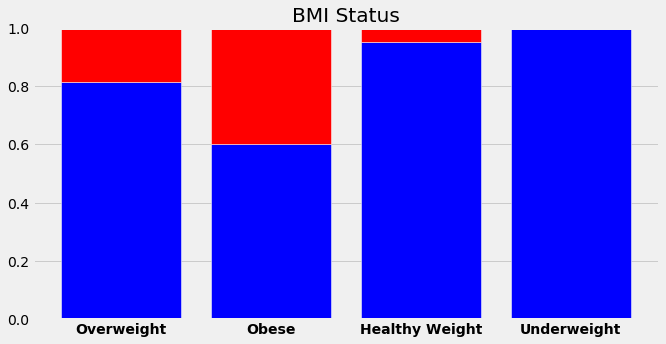

In [55]:
# Create Plot
stacked_plot('bmi_interp','BMI Status')

We can see that increasing BMI leads to increased proportion of diabetes. We also know this clinically since many of the metabolic risk factors behind obesity/overweight underpin diabetes. All in all this indicates that `BMI Status` is an excellent predictor variable from a data science and clinical perspective. 

## Logistic Regression

Now that our variables have been successfully converted and our outcome has been defined, we can analyze our data. Logistic regression is a mathematical model that estimates the probability of a binary outcome (such as our risk label). It is named after the logistic curve which takes the S-shape depicted below.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png?1566122052688" alt="Logistic Curve" title="Logistic Curve" />

**Pre-Check:** What is our primary outcome? What information will a logistic regression model tell you about our outcome?

Our primary outcome is whether the individual has diabetes. The logistic regression model will allow us to see how individuals variables affect whether an individual has a stroke **while controlling for other variables in the model**. For instance, we can see whether being older affects having diabetes while controlling for weight, genetics, etc...

Very useful indeed!

**Follow-Up:** What is statistical significance? What is a generally accepted level of statistical significance in healthcare research?

It will allow us to analyze which variables have a statistically significant effect on whether an asthmatic individual is at high- or low-risk. Logistic regression is a commonly used technique in health analytics because it is easy to interpret and is thought to model the multi-factorial causes of disease well. 

Statistical Significance can be defined as the chance that the relationship you observed in your data occurred by chance. What does this mean? Let's say our logistic regression model finds that weight has a statistically significant effect on being at high risk or low risk asthmatic patient. This means that it is more likely that there is indeed a relationship between weight and risk than chance would suggest. 

The conventional level of significance that is accepted is < 0.05 (this number is referred to as a p-value). This means that there is less than 5% chance that the observed relationship in the data was due to chance alone. 

Let's create out logistic model

By converting Outcome (1 or 0) into 'Diabetes' or 'No diabetes', we've changed the variable values into something meaningful. We now need to change the variable into 1 and 0 to represent a binary variable in Python.

In [35]:
pima_diabetes.loc[pima_diabetes.Outcome=='No diabetes','Outcome']=0
pima_diabetes.loc[pima_diabetes.Outcome=='Diabetes','Outcome']=1

In [38]:
# Split the data into a dependent variable and independent variables
X=pima_diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','bmi_interp','Insulin','DiabetesPedigreeFunction','Age']]
X=pd.get_dummies(X)
Y=pima_diabetes.Outcome
print('split completed')

In [39]:
# Create a logistic regression model
model=sm.GLM(Y,X)
result=model.fit()
print('model trained')

In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  368
Model:                            GLM   Df Residuals:                      357
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.13904
Method:                          IRLS   Log-Likelihood:                -153.55
Date:                Tue, 28 Jan 2020   Deviance:                       49.636
Time:                        10:02:18   Pearson chi2:                     49.6
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Pregnancies                   0.0132      0.009      1.409      0.159      -0.005       0.032
Glucose                       0.0068      0.001      7.927      0.000       0.005       0.008
BloodPressure                 0.0024      0.002      1.339      0.181      -0.001       0.006
SkinThickness                 0.0022      0.002      0.939      0.348      -0.002       0.007
Insulin                      -0.0001      0.000     -0.433      0.665      -0.001       0.000
DiabetesPedigreeFunction      0.2556      0.062      4.097      0.000       0.133       0.378
Age                           0.0037      0.003      1.265      0.206      -0.002       0.010
bmi_interp_Healthy Weight    -1.0837      0.144     -7.522      0.000      -1.366      -0.801
bmi_interp_Obese             -0.9745      0.161     -6.053      0.000      -1.290      -0.659
bmi_interp_Overweight        -1.0824      0.149     -7.255      0.000      -1.375      -0.790
bmi_interp_Underweight       -1.0111      0.395     -2.560      0.010      -1.785      -0.237
=============================================================================================
"""

We can see that several of our variables do not have a statistically significant effect. Several of these variables are clinically relevant. For instance, we know that hypertensive and older individuals are at higher risk for diabetes. For this reason we will be keeping it in our model. 

While statistical significance is important, it is always more important to consider whether our predictors are clinically relevant for the outcome we will be predicting. Remember to alway consider the clinical significance of a variable and not just the statistical significance!

# Building A Predictive Model

**Pre-Check:** So far we haven't done any machine learning yet. What we've done can be considered traditional statistical analysis. What differentiate machine learning for statistical analysis?

In machine learning, data is split into a training set and a test set. A machine learning model is then trained on the training set to predict whatever outcome of interest it was designed to predict (in our case we're predicting whether the patient has diabetes). The model's predictive performance is then evaluated using the test set. 

<img src="https://www.sqlservercentral.com/wp-content/uploads/2019/05/Image-2.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

For our case, we will be using a model called gradient boosting machines. To understand gradient boosting machines we first must understand what boosting and decision trees are. Boosting is the process of converting a weak learner into a strong learner. Decision trees are charts which help make a decision or prediction. Each branch represents a possible outcome. The end of branches represent an end result or decision.

Decision trees are common in medical settings. For instance, below is an algorithm for evaluating febrile seizures. This is an example of a decision tree.

<img src="https://img.grepmed.com/uploads/1105/febrileseizure-management-algorithm-diagnosis-complex-original.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

Gradient boosting machines train numerous decision trees. With each training iteration, the algorithm identifies weak decision trees, and subsequently improves on this tree. This process continues until we have our final model. This final model is a curated and weighted sum of the predictions made by previous decision trees run by the algorithm. 

We now need to split our data into training and test data. We will be splitting our data into 80% training data and 20% test data.

In [41]:
# Split the training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

Now let's fit our model to the training data. We will then take a look at our model's performance using the test data and a confusion matrix.

> If you're unsure what a confusion matrix is, please consult section 5.0.1 ('What is a Confusion Matrix')

In [56]:
# Create a gradient boosting classifier
gbm=GradientBoostingClassifier()

# Fit the model to the training data
gbm.fit(X_train,y_train)
print('model trained')

model trained


In [43]:
# Use test data to evaluate the performance of the model
y_pred=gbm.predict(X_test)
print('prediction completed')

In [44]:
# Output results
print('Outputing results...')
conf_mat = confusion_matrix(y_test, y_pred)
print('confusion matrix')
print(conf_mat)
print(classification_report(y_test,y_pred))

Outputing results...
confusion matrix
[[44 10]
 [ 6 14]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        54
           1       0.58      0.70      0.64        20

    accuracy                           0.78        74
   macro avg       0.73      0.76      0.74        74
weighted avg       0.80      0.78      0.79        74



Here we can see several useful metrics for our model. For instance, we have an `Accuracy` of 0.78, a `Precision` of 0.73 anda `Recall` of 0.76. The necessary metrics will depend on the task a model is designed for. 

### What Is A Confusion Matrix

A confusion matrix is a 2x2 table which computes 4 different combinations of predicted vs. actual values. The combinations are True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)

<img src="https://miro.medium.com/max/320/1*Z54JgbS4DUwWSknhDCvNTQ.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

These 4 interpretations can be combined to generate many useful metrics. For our purpose there are three we will focus on. The first is accuracy:

\[\large (TP + TN)/Total\]

Accuracy allows us to measure how often our model predicted correctly. The second metric is recall:

\[\large TP / (TP + FN)\]

Recall asks the question, that when our outcome is actually positive (ie. in our case when our patient actually has diabetes) how often will the model predict positively (ie. how often will the model then predict the patient to have diabetes). The final metric is precision:

\[\large TP / (TP + FP)\]

Precision asks the question, that when the model predicts positively (ie. in our case when the model predicts the patient to have diabetes) how often will the outcome be actually positive (ie. how often will our patient actually has diabetes.)

## Evaluating our Model

We will be evaluating our model using a receiver operating curve (ROC) and the area under the curve (AUC) value. 

> If you're unsure what a ROC or AUC value is, please consult section 5.1.1 ('Understanding ROC Curves and AUC Values')

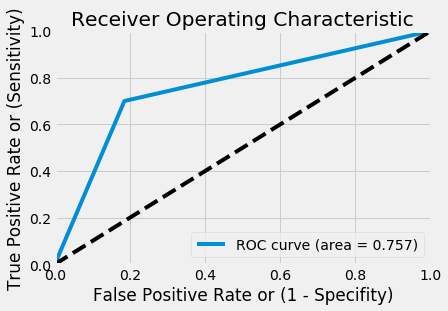

In [45]:
# Compute fpr, tpr, thresholds and roc auc
roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [46]:
# Calculate the area under the curve (AUC)
print('AUC:', roc_auc.round(2))

AUC: 0.76


The closer to the top left corner our ROC curve, the better. The higher our AUC value, the better. These metrics provide useful measures when tuning our model. They are also better overall measures than accuracy alone. We can compare different models using these two metrics. 

### Understanding ROC Curves and AUC Values

A ROC plots sensitivity (probability of predicting a real positive will be positive) against 1-specificity (the probability of predicting a real negative will be positive). A model with a 50-50 chance of making a correct decision will have a ROC curve which is just a diagonal line. A model with a curve that hugs the top left corner is a perfect model. The area under a curve is a measure of the magnitude of the ROC curve. The closer the ROC curve is to the top left corner, the higher the AUC value. The higher the AUC value, the better. 

<img src="https://miro.medium.com/max/406/1*pk05QGzoWhCgRiiFbz-oKQ.png" style="float: center; width: 34%; margin-bottom: 0.5em;">

## Explaining our Model

An important part of understanding and communicating the results of any model is explaining the model. We can dive further into our model by assessing which variables were most important for our model's performance. 

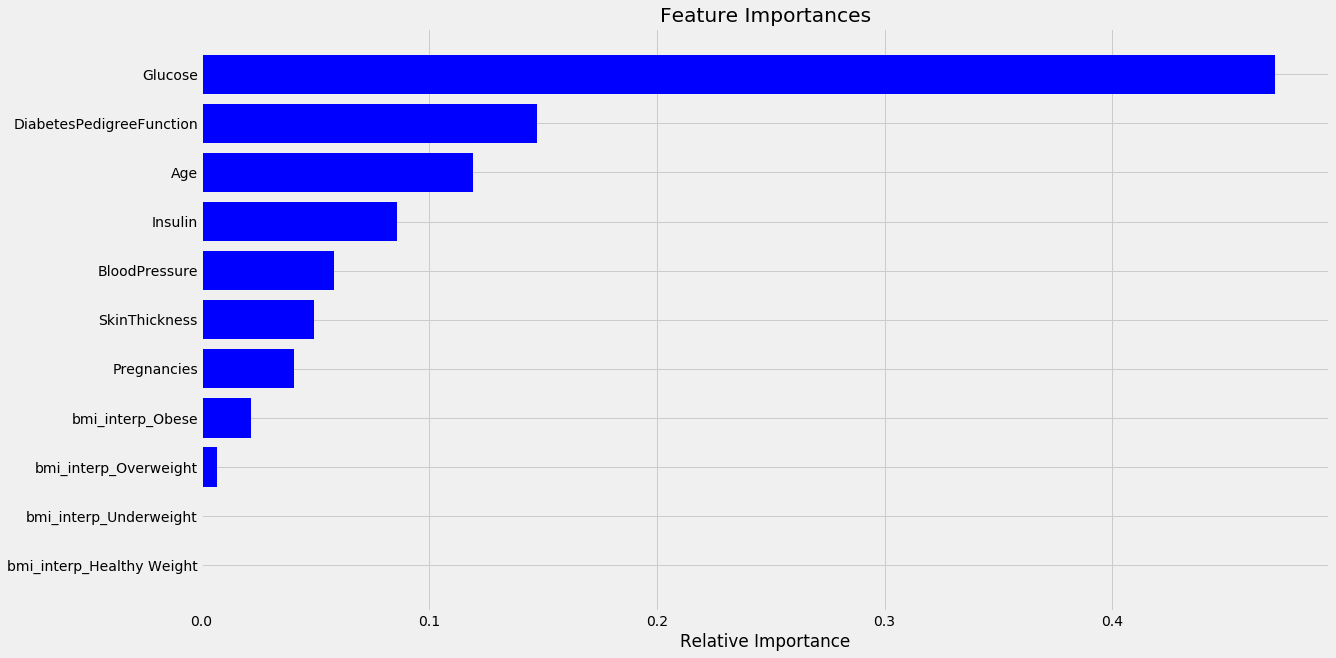

In [47]:
features=X_train.columns
importances = gbm.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

We can see that `Glucose` was by far the most important variable. This makes sense since diabetes is a reflection of abnormally high blood glucose levels. What's surprising is how much of an effect that `DiabetsPedigreeFunction` is. There are two variants of diabetes, Type 1 and Type 2. Type 2 diabetes has a strong genetic component. This indicates many in our data have type 2 diabetes. Variable importance can be a good way to look for surprising results. Any surprising variables can be the subject of further investigation!

Congratulations! You've reached the end of the case! This case provided just one example of how analytics and healthcare can be combined to solve clinical problems. I hope your curiosity has been piqued. There will be much more to learn and much more you can explore in this field!